In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline
# resource = https://medium.com/analytics-vidhya/clustering-on-iris-dataset-in-python-using-k-means-4735b181affe


In [4]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Visualising the data

Firstly, we will check the trends between fields through a pairplot (correlaton plot)

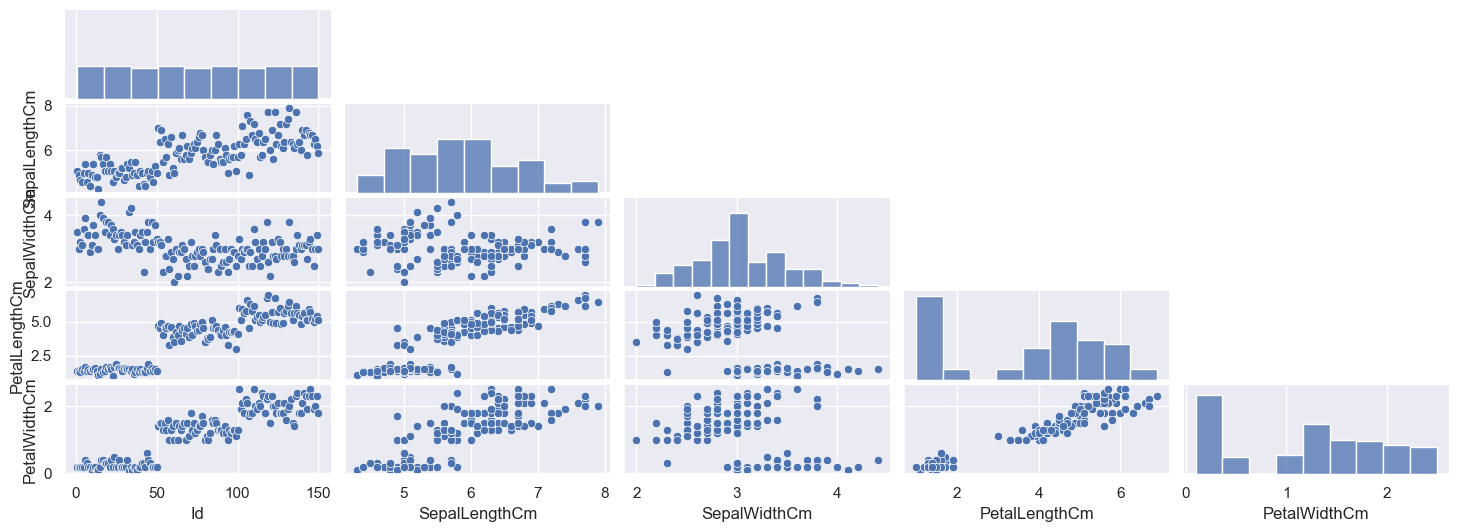

In [24]:
#sns.set(rc = {'figure.figsize':(10,5)})
g= sns.pairplot(df_iris, corner=True)
g.fig.set_size_inches(15,5)

Model Development

In [25]:
#Converting all fields into a multidimensional array where the record is stored in a array of an array
X = df_iris.iloc[:, [0,1,2,3]].values
X[:3]

array([[1. , 5.1, 3.5, 1.4],
       [2. , 4.9, 3. , 1.4],
       [3. , 4.7, 3.2, 1.3]])

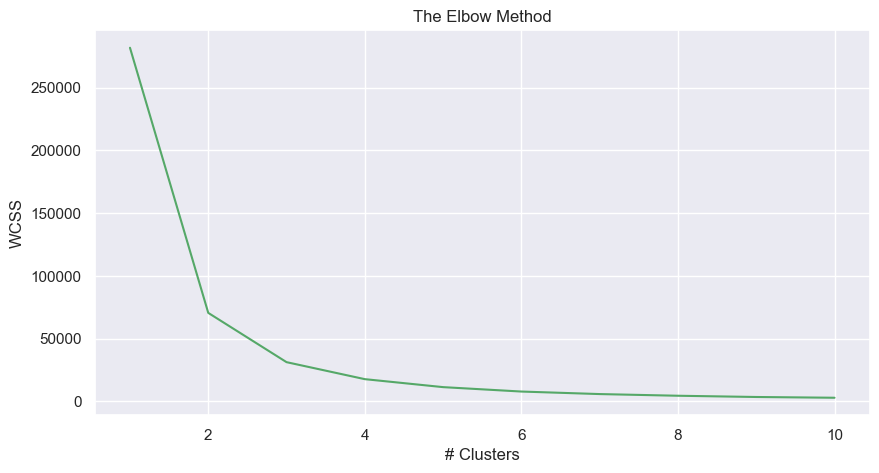

In [30]:
#Stands for the Within Cluster Sum of Squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter= 300, n_init=10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'"Sol1. Linear Regression.ipynb"
plt.plot(range(1,11), wcss, color='g')
plt.title('The Elbow Method')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')
plt.show()


# Evaluation

Will apply K Means to the dataset then will create the K Means classifier

In [33]:
# Apply kmeans to the dataset
kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

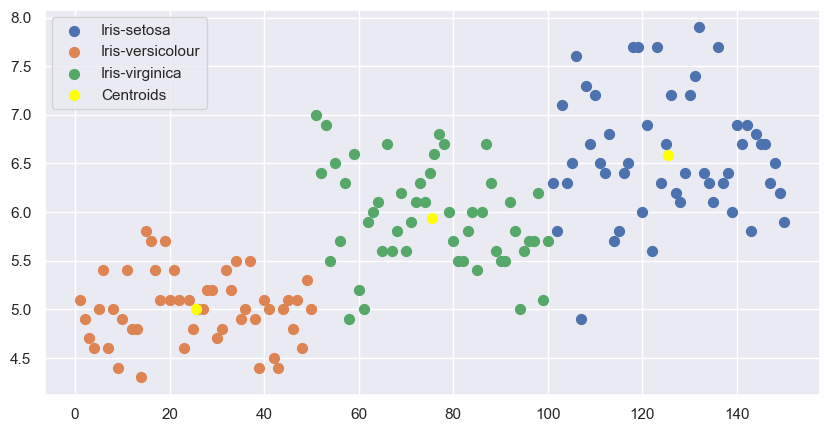

In [56]:
#Plot the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=50, label='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s=50, label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s=50, label= 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c = 'yellow', label= 'Centroids')
plt.legend()
